In [2]:
import numpy as np
import math
from collections import Counter

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from plotly import graph_objects as go

import hashlib
import re
from string import ascii_lowercase

from time import sleep


--- Day 1: Not Quite Lisp ---  

Santa was hoping for a white Christmas, but his weather machine's "snow" function is powered by stars, and he's fresh out! To save Christmas, he needs you to collect fifty stars by December 25th.

Collect stars by helping Santa solve puzzles. Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

Here's an easy puzzle to warm you up.

Santa is trying to deliver presents in a large apartment building, but he can't find the right floor - the directions he got are a little confusing. He starts on the ground floor `(floor 0)` and then follows the instructions one character at a time.

An opening parenthesis, (, means he should go up one floor, and a closing parenthesis, ), means he should go down one floor.

The apartment building is very tall, and the basement is very deep; he will never find the top or bottom floors.

For example:

```
(()) and ()() both result in floor 0.
((( and (()(()( both result in floor 3.
))((((( also results in floor 3.
()) and ))( both result in floor -1 (the first basement level).
))) and )())()) both result in floor -3.
```

<p style = 'color:yellow;'>To what floor do the instructions take Santa?</p>


In [3]:
with open('day_1.txt', 'r') as f:
    line = f.read()

In [4]:
count = 0
for i, ch in enumerate(line):
    if ch == '(':
        count += 1
    elif ch == ')':
        count -= 1
                
print(count)

74


--- Part Two ---  

Now, given the same instructions, find the position of the first character that causes him to enter the basement (floor -1). The first character in the instructions has position 1, the second character has position 2, and so on.

For example:
```
`)` causes him to enter the basement at character position 1.  
`()())` causes him to enter the basement at character position 5.  
```

<p style = 'color:yellow;'>What is the position of the character that causes Santa to first enter the basement?</p>

In [5]:
count = 0
basement = 0
for i, ch in enumerate(line):
    if ch == '(':
        count += 1
    elif ch == ')':
        count -= 1
    if basement == 0 and count == -1:
        basement = i+1
        
print(basement)

1795


--- Day 2: I Was Told There Would Be No Math ---  

The elves are running low on wrapping paper, and so they need to submit an order for more. They have a list of the dimensions (length l, width w, and height h) of each present, and only want to order exactly as much as they need.

Fortunately, every present is a box (a [perfect right rectangular prism]('https://en.wikipedia.org/wiki/Cuboid#Rectangular_cuboid')), which makes calculating the required wrapping paper for each gift a little easier: find the surface area of the box, which is `2*l*w + 2*w*h + 2*h*l`. The elves also need a little extra paper for each present: the area of the smallest side.

For example:

- A present with dimensions `2x3x4` requires `2*6 + 2*12 + 2*8 = 52` square feet of wrapping paper plus 6 square feet of slack, for a total of 58 square feet.  
- A present with dimensions `1x1x10` requires `2*1 + 2*10 + 2*10 = 42` square feet of wrapping paper plus 1 square foot of slack, for a total of 43 square feet.  


<p style = 'color:yellow;'>All numbers in the elves' list are in feet. How many total square feet of wrapping paper should they order?</p>

In [6]:
with open('day_2.txt', 'r') as f:
    line = f.read().splitlines()

In [7]:
def cuboid(input_str:str)->int:
    prep = input_str.split('x')
    prep_int = [int(x) for x in prep]
    ans_list = []
    lw = prep_int[0]*prep_int[1]
    wh = prep_int[1]*prep_int[2]
    hl = prep_int[2]*prep_int[0]
    for i in [lw, wh, hl]:
        ans_list.append(i)
    ans_list = sorted(ans_list)
    minimum = ans_list[0]
    side_sum = sum([x*2 for x in [lw+wh+hl]])
    
    return side_sum+minimum

In [8]:
# test
cuboid('2x3x4')

58

In [9]:
total_sum = 0
for i in line:
    total_sum+=cuboid(i)
    
print(total_sum)

1586300


--- Part Two ---  

The elves are also running low on ribbon. Ribbon is all the same width, so they only have to worry about the length they need to order, which they would again like to be exact.

The ribbon required to wrap a present is the shortest distance around its sides, or the smallest perimeter of any one face. Each present also requires a bow made out of ribbon as well; the feet of ribbon required for the perfect bow is equal to the cubic feet of volume of the present. Don't ask how they tie the bow, though; they'll never tell.

For example:

- A present with dimensions `2x3x4` requires `2+2+3+3 = 10` feet of ribbon to wrap the present plus `2*3*4 = 24` feet of ribbon for the bow, for a total of 34 feet.  
- A present with dimensions `1x1x10` requires `1+1+1+1 = 4` feet of ribbon to wrap the present plus `1*1*10 = 10` feet of ribbon for the bow, for a total of 14 feet.  

<p style = 'color:yellow;'>How many total feet of ribbon should they order?</p>

In [10]:
def cuboid_2(input_str:str)->int:
    prep = input_str.split('x')
    prep_int = sorted([int(x) for x in prep])
    
    ribbon_wrap = sum(prep_int[0:2]*2)    
    ribbon_bow = math.prod(prep_int)
    
    return ribbon_wrap+ribbon_bow

In [11]:
# cuboid_2('2x3x4')
total_sum = 0
for i in line:
    total_sum+=cuboid_2(i)
    
print(total_sum)

3737498


--- Day 3: Perfectly Spherical Houses in a Vacuum ---  

Santa is delivering presents to an infinite two-dimensional grid of houses.

He begins by delivering a present to the house at his starting location, and then an elf at the North Pole calls him via radio and tells him where to move next. Moves are always exactly one house to the north (`^`), south (`v`), east (`>`), or west (`<`). After each move, he delivers another present to the house at his new location.

However, the elf back at the north pole has had a little too much eggnog, and so his directions are a little off, and Santa ends up visiting some houses more than once. 
<p style = 'color:yellow;'>How many houses receive at least one present?</p>

For example:

`>` delivers presents to 2 houses: one at the starting location, and one to the east.  
`^>v<` delivers presents to 4 houses in a square, including twice to the house at his starting/ending location.  
`^v^v^v^v^v` delivers a bunch of presents to some very lucky children at only 2 houses.  

In [12]:
test_str = '^>v<'
ans = Counter(test_str)
# ans

def matrix_size(input_dict:dict)->tuple:
    row_counter = 2*(input_dict['<'] + input_dict['>'])
    if row_counter%2==0:
        row_counter+=1
    
    col_counter = 2*(input_dict['^'] + input_dict['v'])
    if col_counter%2==0:
        col_counter+=1
    
    return (row_counter, col_counter)

step_dict = {'^': [0, -1],
             'v': [0, 1],
             '<': [-1, 0],
             '>': [1, 0]}

In [13]:
with open('day_3.txt', 'r') as f:
    line = f.read()
    
ans = Counter(line)

ans

Counter({'v': 2042, '>': 2007, '<': 2068, '^': 2075})

In [14]:
mtx = np.zeros(matrix_size(ans))


central_col = int((len(mtx[0])/2)-0.5)
central_row = int((len(mtx[:, 0])/2)-0.5)
mtx[central_row, central_col] = 1

col = central_col
row = central_row

for i in line:
    temp = step_dict[i]
    col = col+temp[0]
    row = row+temp[1]
    mtx[row, col] += 1
    
    i


mtx = mtx[:,~np.all(mtx == 0, axis = 0)]
mtx = mtx[~np.all(mtx == 0, axis=1)]


np.count_nonzero(mtx)

2572

<AxesSubplot: >

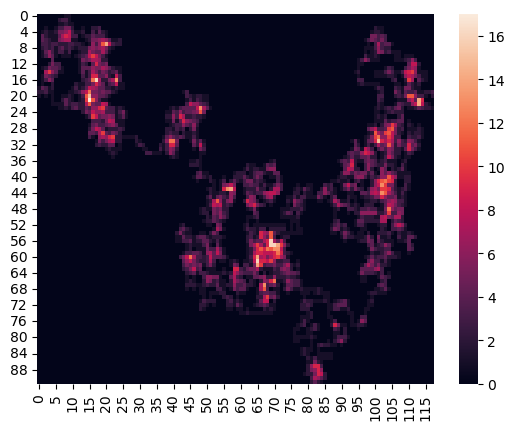

In [15]:
sns.heatmap(mtx)


In [16]:
mtx.shape

(92, 118)

In [17]:
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

# fig = plt.figure(figsize=(10,6))
# plt.xlim(0, mtx.shape[1])
# plt.ylim(0, mtx.shape[0])

# def animate(i):
#     data = overdose.iloc[:int(i+1)] #select data range
#     p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
#     p.tick_params(labelsize=17)
#     plt.setp(p.lines,linewidth=7)

--- Part Two ---  

The next year, to speed up the process, Santa creates a robot version of himself, Robo-Santa, to deliver presents with him.

Santa and Robo-Santa start at the same location (delivering two presents to the same starting house), then take turns moving based on instructions from the elf, who is eggnoggedly reading from the same script as the previous year.

<p style = 'color:yellow;'>This year, how many houses receive at least one present?</p>

For example:

`^v` delivers presents to 3 houses, because Santa goes north, and then Robo-Santa goes south.  
`^>v<` now delivers presents to 3 houses, and Santa and Robo-Santa end up back where they started.  
`^v^v^v^v^v` now delivers presents to 11 houses, with Santa going one direction and Robo-Santa going the other.

In [18]:
# test_line = '^v^v^v^v^v'

santa = ''
robot = ''

for i, x in enumerate(line):
    if i == 0:
        santa = santa+x
        # robot = robot+x
    elif i%2==0:
        santa = santa+x
    elif i%2!=0:
        robot = robot+x

In [19]:
# summary matrix
ans = Counter(line)
mtx_santa = np.zeros(matrix_size(ans))
mtx_robot = np.zeros(matrix_size(ans))

In [20]:
# santa
central_col = int((len(mtx_santa[0])/2)-0.5)
central_row = int((len(mtx_santa[:, 0])/2)-0.5)
mtx_santa[central_row, central_col] = 1

col = central_col
row = central_row

for i in santa:
    temp = step_dict[i]
    col = col+temp[0]
    row = row+temp[1]
    mtx_santa[row, col] += 1

In [21]:
# robot
central_col = int((len(mtx_robot[0])/2)-0.5)
central_row = int((len(mtx_robot[:, 0])/2)-0.5)
mtx_robot[central_row, central_col] = 0

col = central_col
row = central_row

for i in robot:
    temp = step_dict[i]
    col = col+temp[0]
    row = row+temp[1]
    mtx_robot[row, col] += 1

In [22]:
mtx_both = mtx_santa+mtx_robot

mtx_both = mtx_both[:,~np.all(mtx_both == 0, axis = 0)]
mtx_both = mtx_both[~np.all(mtx_both == 0, axis=1)]

np.count_nonzero(mtx_both)

2631

<AxesSubplot: >

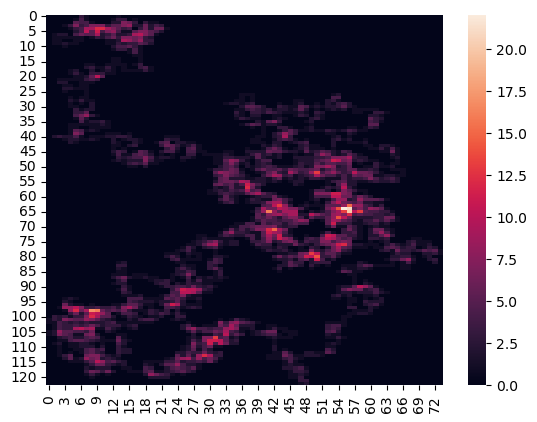

In [23]:
sns.heatmap(mtx_both)

--- Day 4: The Ideal Stocking Stuffer ---  

Santa needs help mining some AdventCoins (very similar to bitcoins) to use as gifts for all the economically forward-thinking little girls and boys.

To do this, he needs to find [MD5]('https://en.wikipedia.org/wiki/MD5') hashes which, in [hexadecimal]('https://en.wikipedia.org/wiki/Hexadecimal'), start with at least `five zeroes`. The input to the MD5 hash is some secret key (your puzzle input, given below) followed by a number in decimal. 
<p style = 'color:yellow;'>To mine AdventCoins, you must find Santa the lowest positive number (no leading zeroes: 1, 2, 3, ...) that produces such a hash.</p>

For example:

- If your secret key is `abcdef`, the answer is `609043`, because the MD5 hash of `abcdef609043` starts with five zeroes (`000001dbbfa...`), and it is the lowest such number to do so.
- If your secret key is `pqrstuv`, the lowest number it combines with to make an MD5 hash starting with five zeroes is `1048970`; that is, the MD5 hash of `pqrstuv1048970` looks like `000006136ef....`  

Your puzzle input is `iwrupvqb`.

In [24]:
data = 'iwrupvqb'
num = 0
while True:
    str2hash = data + str(num)
    result = hashlib.md5(str2hash.encode())
    if result.hexdigest()[0:5] == "00000":
        break
        
    num+=1
print(num)

346386


<p style = 'color:yellow;'>Now find one that starts with `six zeroes`.</p>

In [25]:
data = 'iwrupvqb'
num = 0
while True:
    str2hash = data + str(num)
    result = hashlib.md5(str2hash.encode())
    if result.hexdigest()[0:6] == "000000":
        break
        
    num+=1
print(num)

9958218


--- Day 5: Doesn't He Have Intern-Elves For This? ---  

Santa needs help figuring out which strings in his text file are naughty or nice.

A nice string is one with all of the following properties:

- It contains at least three vowels (`aeiou` only), like `aei`, `xazegov`, or `aeiouaeiouaeiou`.
- It contains at least one letter that appears twice in a row, like `xx`, `abcdde` (dd), or `aabbccdd` (aa, bb, cc, or dd).
- It does not contain the strings `ab`, `cd`, `pq`, or `xy`, even if they are part of one of the other requirements.

For example:  

- `ugknbfddgicrmopn` is nice because it has at least three vowels (`u...i...o...`), a double letter (`...dd...`), and none of the disallowed substrings.
- `aaa` is nice because it has at least three vowels and a double letter, even though the letters used by different rules overlap.
- `jchzalrnumimnmhp` is naughty because it has no double letter.
- `haegwjzuvuyypxyu` is naughty because it contains the string `xy`.
- `dvszwmarrgswjxmb` is naughty because it contains only one vowel.

<p style = 'color:yellow;'>How many strings are nice?</p>

In [26]:
with open('day_5.txt', 'r') as f:
    line = f.read().split('\n')

In [27]:
test_lines = ['ugknbfddgicrmopn', 'aaa','jchzalrnumimnmhp', 'haegwjzuvuyypxyu', 'dvszwmarrgswjxmb']

In [28]:
vowels_str = 'aeiou'
bad_pairs = ['ab', 'cd', 'pq', 'xy']
regexp = re.compile(r"(.)\1")

def check_nice_string(input_str:str):
    out_str = input_str.translate(input_str.maketrans('','',vowels_str)).replace('  ', ' ').strip()
    if len(input_str) - len(out_str) >=3:
        if re.search(regexp, input_str):
            counter = 0
            for p in bad_pairs:
                if p not in input_str:
                    counter+=1
                    
                    if counter == len(bad_pairs):
                        return True
                    
                else:
                    return False
        else:
            return False
    else:
        return False

In [29]:
nice_counter = 0
for i in line:
    if check_nice_string(i):
        nice_counter+=1
        
print(nice_counter)

236


--- Part Two ---  

Realizing the error of his ways, Santa has switched to a better model of determining whether a string is naughty or nice. None of the old rules apply, as they are all clearly ridiculous.

Now, a nice string is one with all of the following properties:

- It contains a pair of any two letters that appears at least twice in the string without overlapping, like `xyxy` (`xy`) or `aabcdefgaa` (`aa`), but not like `aaa` (`aa`, but it overlaps).
- It contains at least one letter which repeats with exactly one letter between them, like `xyx`, `abcdefeghi` (`efe`), or even `aaa`.

For example:

- `qjhvhtzxzqqjkmpb` is nice because is has a pair that appears twice (`qj`) and a letter that repeats with exactly one letter between them (`zxz`).
- `xxyxx` is nice because it has a pair that appears twice and a letter that repeats with one between, even though the letters used by each rule overlap.
- `uurcxstgmygtbstg` is naughty because it has a pair (`tg`) but no repeat with a single letter between them.
- `ieodomkazucvgmuy` is naughty because it has a repeating letter with one between (`odo`), but no pair that appears twice.

<p style = 'color:yellow;'>How many strings are nice under these new rules?</p>

In [30]:
test_lines = ['qjhvhtzxzqqjkmpb', 'xxyxx','uurcxstgmygtbstg', 'ieodomkazucvgmuy']

In [31]:
def create_ngrams(word:str, n:int)->list:
    # Break word into tokens
    tokens = [token for token in word]
    # generate ngram using zip
    ngrams = zip(*[tokens[i:] for i in range(n)])
    # concat with empty space & return
    return [''.join(ngram) for ngram in ngrams]

def slicer(word:str, n:int):
    start_seq = word[:n]
    final = word[n:]
    if start_seq in final:
        return True
    elif start_seq not in final and len(final)==2:
        return False
    else:
        output_str = word[1:]
        return slicer(output_str, n)
    
def triple_checker(word:str, n:int):
    start_seq = word[:n]
    if start_seq[0]==start_seq[n-1]:
        return True
    elif start_seq[0]!=start_seq[n-1] and len(word)==3:
        return False
    elif start_seq[0]!=start_seq[n-1]:
        output_str = word[1:]
        return triple_checker(output_str, n)
    



def check_nice_string_2(input_str:str):
    pair_counter = 0
    if slicer(input_str, 2):
        pair_counter+=1
    
    triple_counter = 0
    if triple_checker(input_str, 3):
        triple_counter+=1
        
    if bool(triple_counter)+bool(pair_counter)==2:
        return True
    else:
        return False

In [32]:
nice_counter = 0
for sent in line:
    if check_nice_string_2(sent):
        nice_counter+=1

print(nice_counter)

51


In [33]:
test_lines = ['aaaa', 'aaabcb']

for i in test_lines:
    print(i, check_nice_string_2(i))

aaaa True
aaabcb False


--- Day 6: Probably a Fire Hazard ---  

Because your neighbors keep defeating you in the holiday house decorating contest year after year, you've decided to deploy one million lights in a 1000x1000 grid.

Furthermore, because you've been especially nice this year, Santa has mailed you instructions on how to display the ideal lighting configuration.

Lights in your grid are numbered from 0 to 999 in each direction; the lights at each corner are at `0,0`, `0,999`, `999,999`, and `999,0`. The instructions include whether to `turn on`, `turn off`, or `toggle` various inclusive ranges given as coordinate pairs. Each coordinate pair represents opposite corners of a rectangle, inclusive; a coordinate pair like `0,0 through 2,2` therefore refers to 9 lights in a 3x3 square. The lights all start turned off.

To defeat your neighbors this year, all you have to do is set up your lights by doing the instructions Santa sent you in order.

For example:

- `turn on 0,0 through 999,999` would turn on (or leave on) every light.
- `toggle 0,0 through 999,0` would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.
- `turn off 499,499 through 500,500` would turn off (or leave off) the middle four lights.

<p style = 'color:yellow;'>After following the instructions, how many lights are lit?<p>

In [34]:
with open('day_6.txt', 'r') as f:
    line = f.read().split('\n')

In [35]:
test_lines = ['turn on 0,0 through 999,999', 'toggle 0,0 through 999,0', 'turn off 499,499 through 500,500']

In [36]:
def lights_counter(input_str:str, matrix):
    pattern = r'(\d+),(\d+)'
    ans_match = re.findall(pattern=pattern, string=input_str)
    
    line_1 = int(ans_match[0][0])
    line_2 = int(ans_match[1][0])
    col_1 = int(ans_match[0][1])
    col_2 = int(ans_match[1][1])
    
    # print(line_1, line_2, col_1, col_2)
    
    if input_str.startswith('turn on'):
        matrix[line_1:line_2+1, col_1:col_2+1] = 1
    elif input_str.startswith('turn off'):
        matrix[line_1:line_2+1, col_1:col_2+1] = 0
    elif input_str.startswith('toggle'):
        matrix[line_1:line_2+1, col_1:col_2+1] -=1
        matrix = abs(matrix)
                
    return matrix

In [37]:
mtx = np.zeros([1000,1000])

for i in line:
    mtx = lights_counter(input_str=i, matrix=mtx)
    
int(np.count_nonzero(mtx))

543903

<AxesSubplot: >

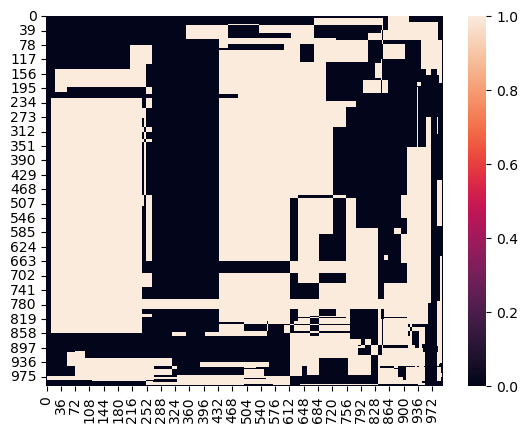

In [38]:
sns.heatmap(mtx)

--- Part Two ---  

You just finish implementing your winning light pattern when you realize you mistranslated Santa's message from Ancient Nordic Elvish.

The light grid you bought actually has individual brightness controls; each light can have a brightness of zero or more. The lights all start at zero.

The phrase `turn on` actually means that you should increase the brightness of those lights by 1.

The phrase `turn off` actually means that you should decrease the brightness of those lights by 1, to a minimum of zero.

The phrase `toggle` actually means that you should increase the brightness of those lights by 2.

<p style = 'color:yellow;'>What is the total brightness of all lights combined after following Santa's instructions?</p>

For example:

- turn on 0,0 through 0,0 would increase the total brightness by 1.
- toggle 0,0 through 999,999 would increase the total brightness by 2000000.

In [39]:
test_lines = ['turn on 0,0 through 0,0', 'toggle 0,0 through 999,999']

In [40]:
def lights_counter_upper(input_str:str, matrix):
    pattern = r'(\d+),(\d+)'
    ans_match = re.findall(pattern=pattern, string=input_str)
    
    line_1 = int(ans_match[0][0])
    line_2 = int(ans_match[1][0])
    col_1 = int(ans_match[0][1])
    col_2 = int(ans_match[1][1])
    
    if input_str.startswith('turn on'):
        matrix[line_1:line_2+1, col_1:col_2+1] += 1
    elif input_str.startswith('turn off'):
        matrix[line_1:line_2+1, col_1:col_2+1] -= 1
        matrix = matrix.clip(0)
    elif input_str.startswith('toggle'):
        matrix[line_1:line_2+1, col_1:col_2+1] += 2
        
    return matrix

In [41]:
mtx = np.zeros([1000,1000])

list_of_matrix = []

for i in line:
    mtx = lights_counter_upper(input_str=i, matrix=mtx)
    list_of_matrix.append(mtx)

In [45]:
fig = go.Figure(
    data=[go.Heatmap(z=list_of_matrix[0])],
    layout=go.Layout(
        title="Frame 0",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Heatmap(z=list_of_matrix[i])],
                     layout=go.Layout(title_text=f"Frame {i}")) 
            for i in range(1, len(list_of_matrix))]
)

fig.show()

In [272]:
int(np.sum(mtx))

14687245

<AxesSubplot: >

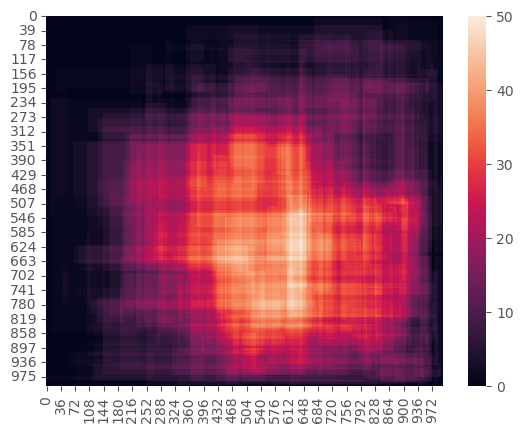

In [273]:
sns.heatmap(mtx)

--- Day 7: Some Assembly Required ---

This year, Santa brought little Bobby Tables a set of wires and [bitwise logic gates](https://en.wikipedia.org/wiki/Bitwise_operation)! Unfortunately, little Bobby is a little under the recommended age range, and he needs help assembling the circuit.

Each wire has an identifier (some lowercase letters) and can carry a 16-bit signal (a number from 0 to 65535). A signal is provided to each wire by a gate, another wire, or some specific value. Each wire can only get a signal from one source, but can provide its signal to multiple destinations. A gate provides no signal until all of its inputs have a signal.

The included instructions booklet describes how to connect the parts together: x AND y -> z means to connect wires x and y to an AND gate, and then connect its output to wire z.

For example:

- `123 -> x` means that the signal 123 is provided to wire x.
- `x AND y -> z` means that the bitwise AND of wire x and wire y is provided to wire z.
- `p LSHIFT 2 -> q` means that the value from wire p is left-shifted by 2 and then provided to wire q.
- `NOT e -> f` means that the bitwise complement of the value from wire e is provided to wire f.

Other possible gates include OR (bitwise OR) and RSHIFT (right-shift). If, for some reason, you'd like to emulate the circuit instead, almost all programming languages (for example, C, JavaScript, or Python) provide operators for these gates.

For example, here is a simple circuit:

```
123 -> x
456 -> y
x AND y -> d
x OR y -> e
x LSHIFT 2 -> f
y RSHIFT 2 -> g
NOT x -> h
NOT y -> i
```

After it is run, these are the signals on the wires:

```
d: 72
e: 507
f: 492
g: 114
h: 65412
i: 65079
x: 123
y: 456
```

<p style = "color:yellow">In little Bobby's kit's instructions booklet (provided as your puzzle input), what signal is ultimately provided to wire a?</p>

